## SHG変換効率の理論的な計算方法

- 変換効率は以下の式で表される。
$$
\eta = \frac{|B(L)|^2}{|A(0)|^2}
$$
  - $A(z)$ は入射光の振幅である。
  - $B(z)$ はSH光の振幅である。

- $A(z)$ と $B(z)$ は、以下の連立微分方程式を満たす。
$$
\frac{d}{dz}A(z) = -j\kappa^* A^*(z)B(z) \exp(j(2\Delta z))
$$
$$
\frac{d}{dz}B(z) = -j\kappa A(z)^2 \exp(j(2\Delta z))
$$

ただし、$\kappa$ および $2\Delta$ は次の式で定義される。

$$
\kappa^{(q)}_{NL} = \frac{2\omega \varepsilon_0}{4} \iint \left[ E^{2\omega}(x, y) \right]^* \mathbf{d_q}(x, y) \left[ E^{\omega}(x, y) \right]^2 dx\,dy
$$
$$
2\Delta^{(q)}_{SHG} = \beta^{2\omega} - \left( 2\beta^{\omega} + qK \right)
$$

ここで、$q$ はQPMの次数であり、通常は1次である。


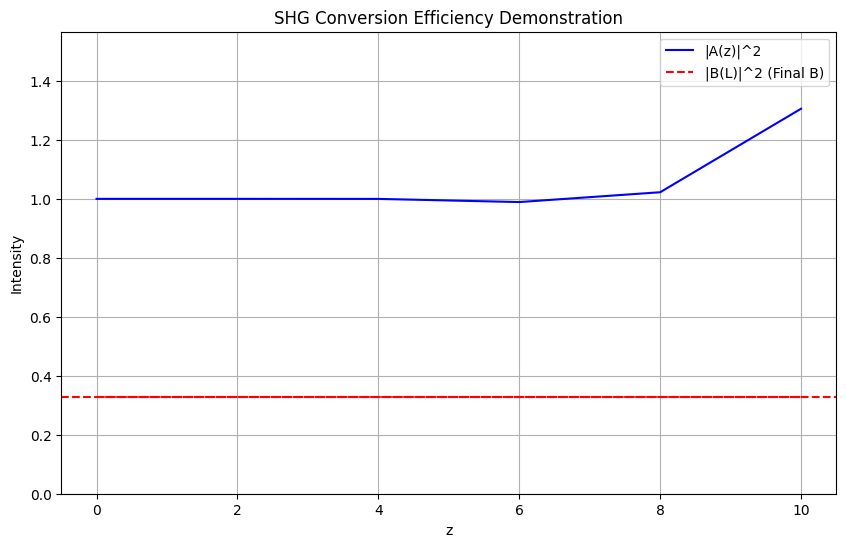

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from syuron import shg

# Parameters for demonstration


def kappa(z: float) -> complex:
    return 0.1 * np.exp(-0.05 * z) + 0j  # Example of kappa(z)


def twodelta() -> float:
    return 0.3  # Example constant value for 2*Delta


# Create an instance of NMCE
nmce = shg.NMCE(kappa, twodelta)

# Set parameters for the simulation
L = 10.0  # Length for integration
A0 = 1.0 + 0j  # Initial condition for A(0)
B0 = 0.0 + 0j  # Initial condition for B(0)

# Solve the equations and get results
B_L, A_z = nmce.solve(L, A0, B0)

# Ensure A_z is a list or array-like object
A_z = np.array(A_z)

# Create a z-axis for plotting
z_values = np.linspace(0, L, len(A_z))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(z_values, np.abs(A_z)**2, label='|A(z)|^2', color='blue')
plt.plot(z_values, np.abs(B_L)**2 * np.ones_like(z_values),
         label='|B(L)|^2 (Final B)', linestyle='--', color='red')
plt.title('SHG Conversion Efficiency Demonstration')
plt.xlabel('z')
plt.ylabel('Intensity')
plt.legend()
plt.grid()
plt.ylim(0, 1.2 * np.max(np.abs(A_z)**2))
plt.axhline(y=np.abs(B_L)**2, color='red',
            linestyle='--', label='Final B Intensity')
plt.show()